In [1]:
import pandas as pd
# Define the file path
file_path = r'C:\Users\Mukesh Kumar\Desktop\Project\kavlium\all the states kalvium.xlsx'
# Read the Excel file
election_data = pd.read_excel(file_path, sheet_name='Sheet1')
# Display the first few rows to understand the data structure
print(election_data.head())

                Constituency  const no        leading candidate  \
0                     Almora       3.0               AJAY TAMTA   
1                    Garhwal       2.0              ANIL BALUNI   
2                   Haridwar       5.0    TRIVENDRA SINGH RAWAT   
3  Nainital-Udhamsingh Nagar       4.0               AJAY BHATT   
4              Tehri Garhwal       1.0  MALA RAJYA LAKSHMI SHAH   

            leading party  Leading In  Won in  Trailing in trailing candidate  \
0  Bharatiya Janata Party           0     5.0          0.0      PRADEEP TAMTA   
1  Bharatiya Janata Party           0     5.0          0.0     GANESH GODIYAL   
2  Bharatiya Janata Party           0     5.0          0.0     VIRENDRA RAWAT   
3  Bharatiya Janata Party           0     5.0          0.0      PRAKASH JOSHI   
4  Bharatiya Janata Party           0     5.0          0.0  JOT SINGH GUNSOLA   

             trailing party  Leading in2  Won in3  Trailing in4    Margin  \
0  Indian National Congress      

In [2]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Mukesh Kumar\Desktop\Project\kavlium\all the states kalvium.xlsx'
election_data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows to understand the data structure
print(election_data.head())

# Check for missing values and data types
print(election_data.info())

# Replace non-numeric values in integer columns with 0
numeric_columns = ['const no', 'Leading In', 'Won in', 'Trailing in', 'Leading in2', 'Won in3', 'Trailing in4', 'Margin']
for column in numeric_columns:
    election_data[column] = pd.to_numeric(election_data[column], errors='coerce').fillna(0).astype(int)

# Ensure correct data types
election_data.info()


                Constituency  const no        leading candidate  \
0                     Almora       3.0               AJAY TAMTA   
1                    Garhwal       2.0              ANIL BALUNI   
2                   Haridwar       5.0    TRIVENDRA SINGH RAWAT   
3  Nainital-Udhamsingh Nagar       4.0               AJAY BHATT   
4              Tehri Garhwal       1.0  MALA RAJYA LAKSHMI SHAH   

            leading party  Leading In  Won in  Trailing in trailing candidate  \
0  Bharatiya Janata Party           0     5.0          0.0      PRADEEP TAMTA   
1  Bharatiya Janata Party           0     5.0          0.0     GANESH GODIYAL   
2  Bharatiya Janata Party           0     5.0          0.0     VIRENDRA RAWAT   
3  Bharatiya Janata Party           0     5.0          0.0      PRAKASH JOSHI   
4  Bharatiya Janata Party           0     5.0          0.0  JOT SINGH GUNSOLA   

             trailing party  Leading in2  Won in3  Trailing in4    Margin  \
0  Indian National Congress      

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")


1. Distribution of Winning Margins
Problem Statement: Analyze the distribution of winning margins across all constituencies.

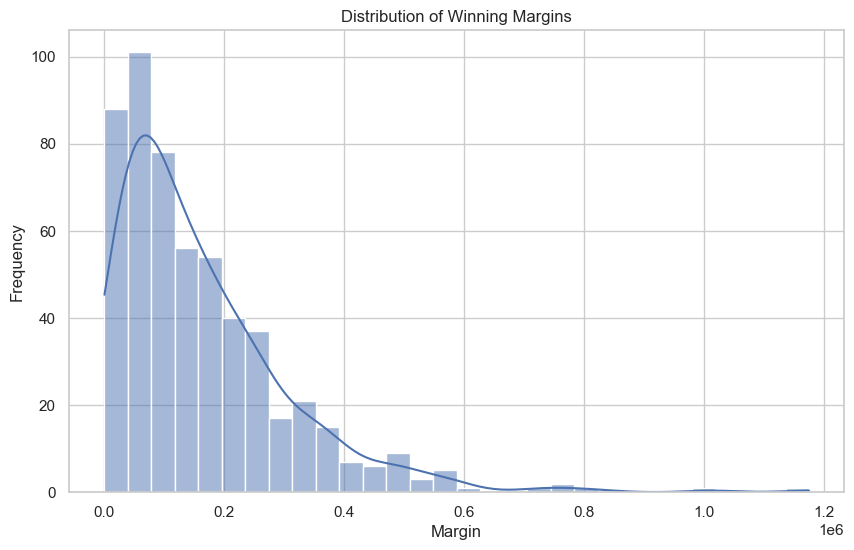

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(election_data['Margin'], kde=True, bins=30)
plt.title('Distribution of Winning Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


Visualization 2: Performance of Major Parties

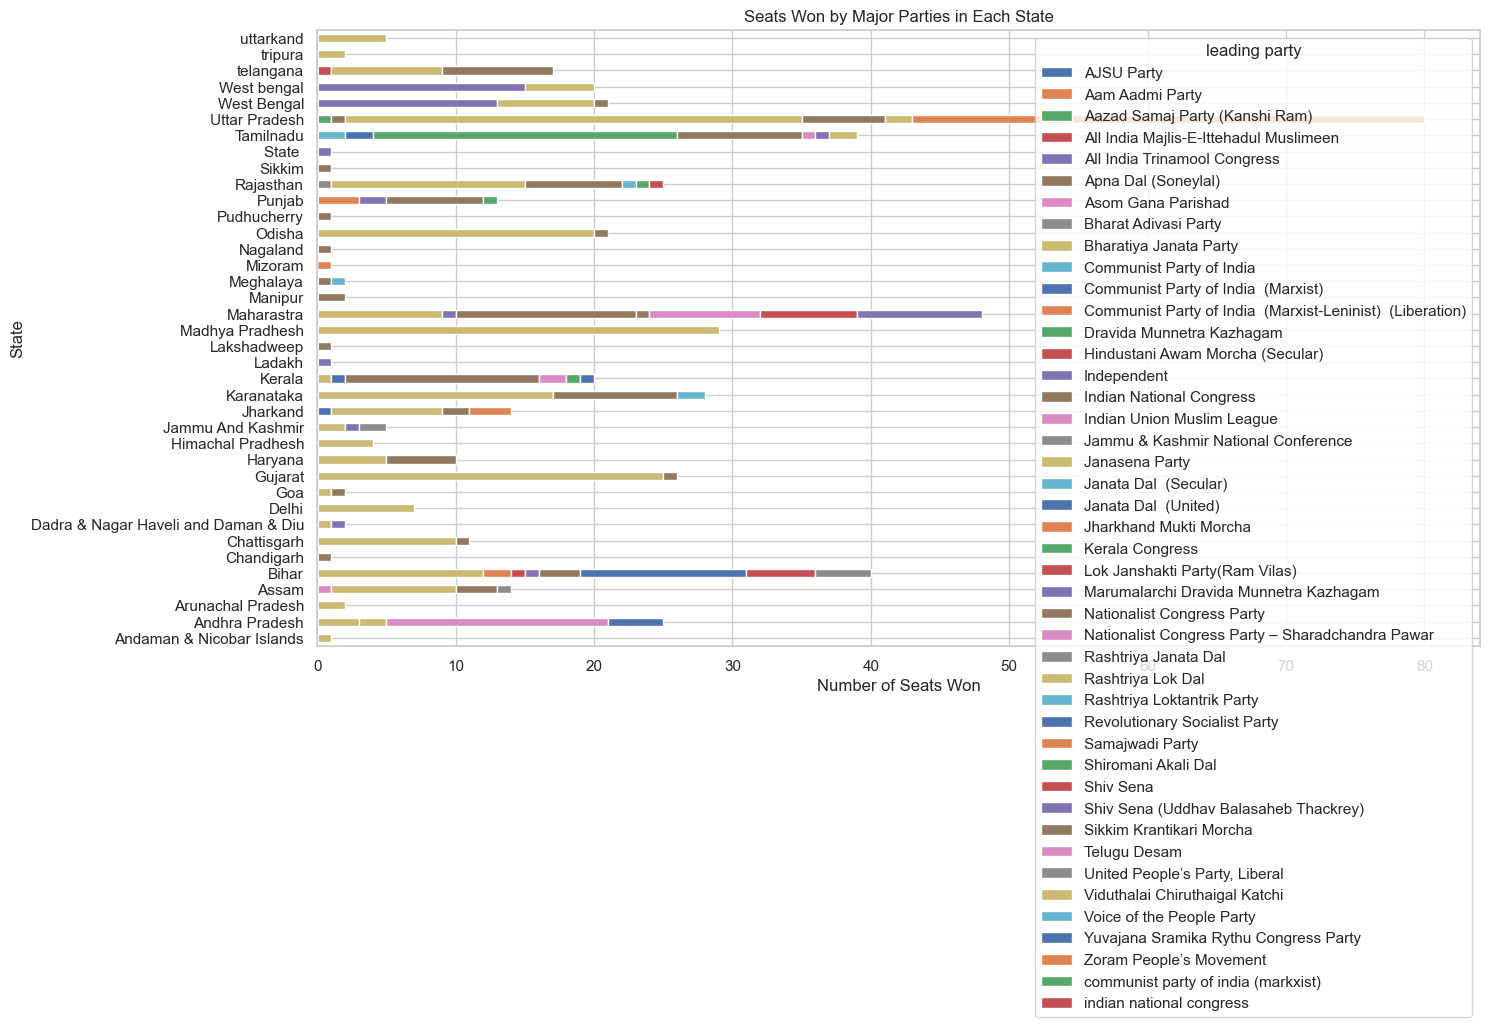

In [5]:


# Group data by State and leading party, and count the number of seats won
seats_won_by_party = election_data.groupby(['State', 'leading party']).size().unstack(fill_value=0)

# Plot
seats_won_by_party.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.title('Seats Won by Major Parties in Each State')
plt.xlabel('Number of Seats Won')
plt.ylabel('State')
plt.show()


3.Leading vs. Trailing Candidates
Problem Statement: Compare the number of constituencies where a party's candidate is leading versus trailing.

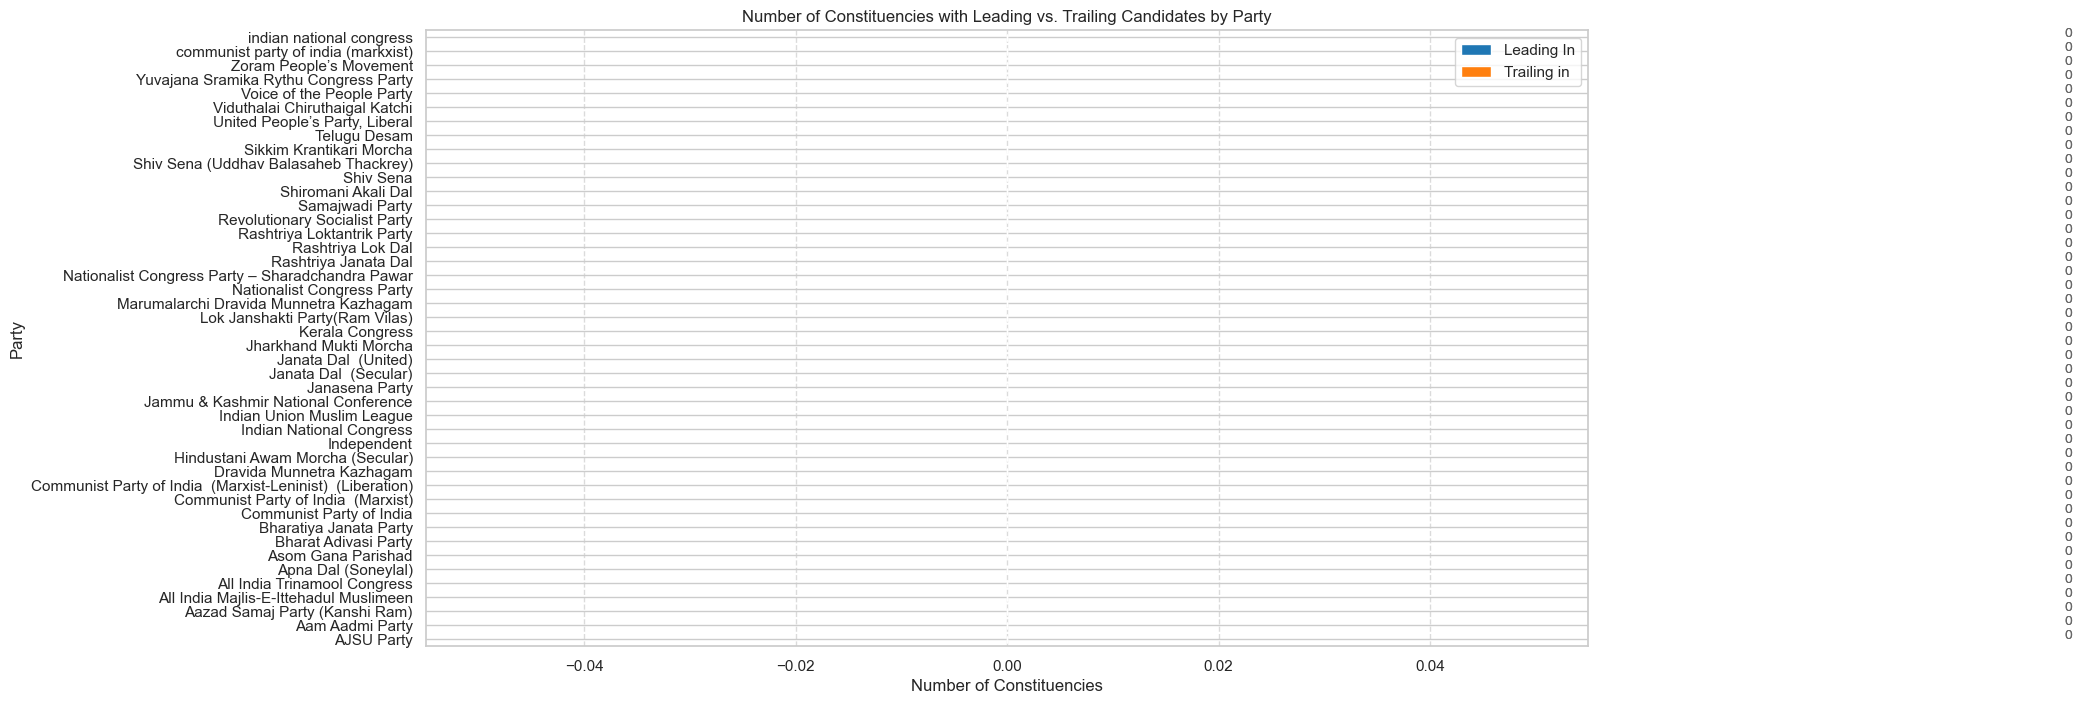

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your election data into a DataFrame called election_data
# If not, you can load it using pd.read_csv or any other method depending on your data source

# Example: Load the data (uncomment and modify the path if needed)
# election_data = pd.read_csv('path_to_your_election_data.csv')

# Count the number of constituencies where each party's candidate is leading or trailing
leading_trailing_counts = election_data.groupby(['leading party'])[['Leading In', 'Trailing in']].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
leading_trailing_counts.plot(kind='barh', x='leading party', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Add annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2,
            str(int(i.get_width())),
            fontsize=10, color='dimgrey')

plt.title('Number of Constituencies with Leading vs. Trailing Candidates by Party')
plt.xlabel('Number of Constituencies')
plt.ylabel('Party')
plt.legend(['Leading In', 'Trailing in'], loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

4. Analysis of Close Contests
Problem Statement: Identify constituencies with close contests (small winning margins).

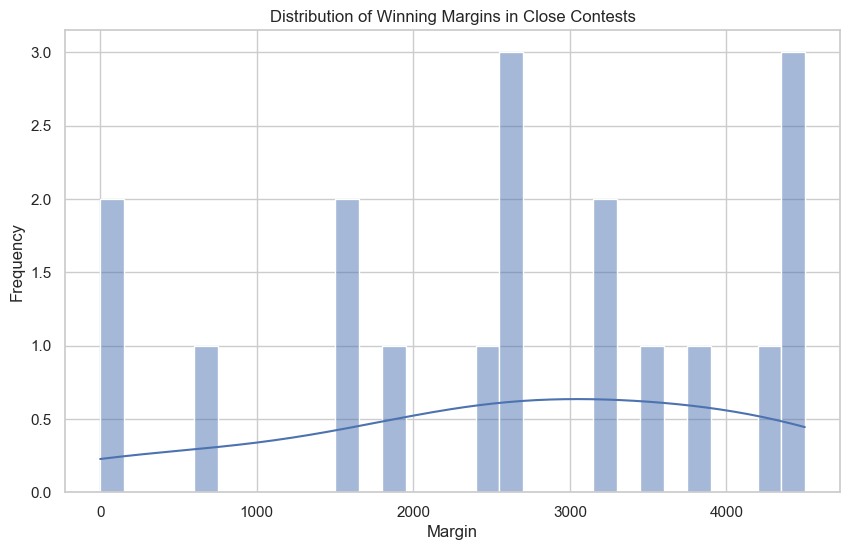

In [7]:
# Define close contests as those with a margin below a certain threshold (e.g., 5000 votes)
close_contests = election_data[election_data['Margin'] < 5000]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(close_contests['Margin'], kde=True, bins=30)
plt.title('Distribution of Winning Margins in Close Contests')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


5. State-wise Leading Party Analysis
Problem Statement: Analyze the leading party in each state.



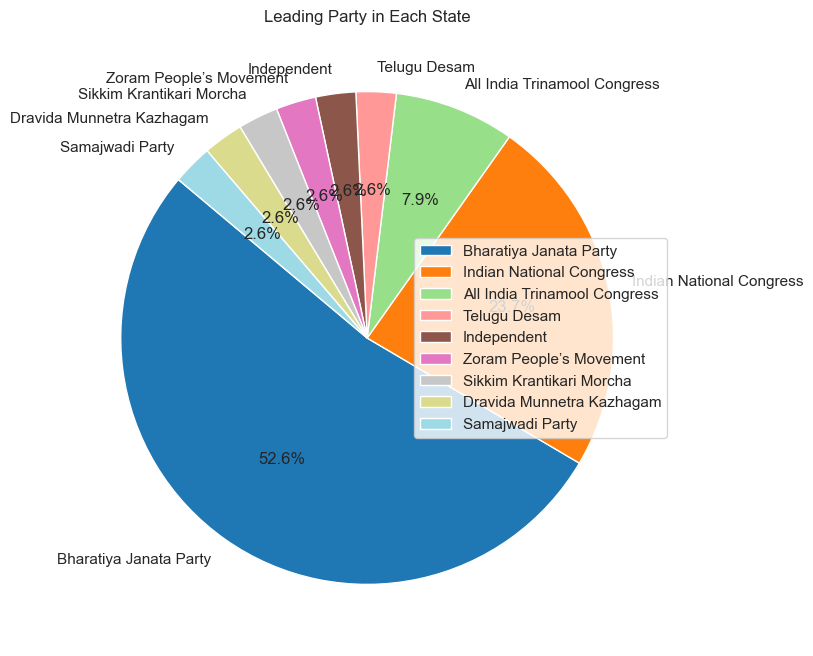

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r'C:\Users\Mukesh Kumar\Desktop\Project\kavlium\all the states kalvium.xlsx'
election_data = pd.read_excel(file_path, sheet_name='Sheet1')

# Group data by State and find the most common leading party in each state
state_leading_party = election_data.groupby('State')['leading party'].agg(lambda x: x.mode()[0]).reset_index()

# Count the number of states for each leading party
leading_party_counts = state_leading_party['leading party'].value_counts()

# Plot
plt.figure(figsize=(10, 8))
leading_party_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20', legend=True)
plt.title('Leading Party in Each State')
plt.ylabel('')
plt.show()

6. Status of Seats (Won vs. Leading)
Problem Statement: Compare the number of seats won versus those where a party is leading.

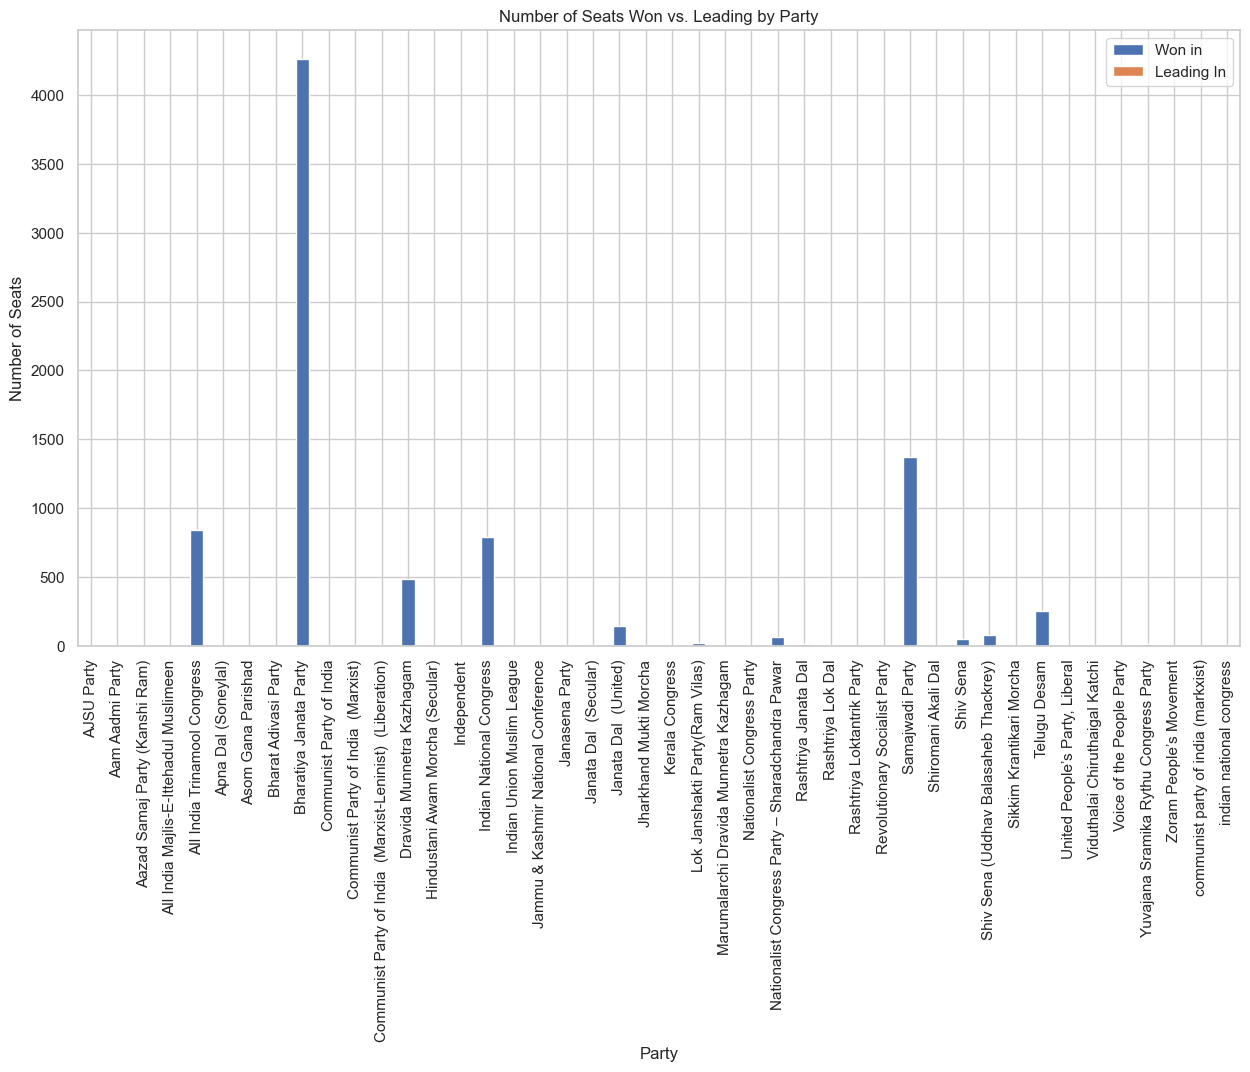

In [9]:
# Group data by leading party and count the number of won and leading seats
status_counts = election_data.groupby('leading party')[['Won in', 'Leading In']].sum().reset_index()

# Plot
status_counts.plot(kind='bar', x='leading party', stacked=True, figsize=(15, 8))
plt.title('Number of Seats Won vs. Leading by Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.show()


7. State-wise Winning Margin Analysis
Problem Statement: Analyze the average winning margin in each state.

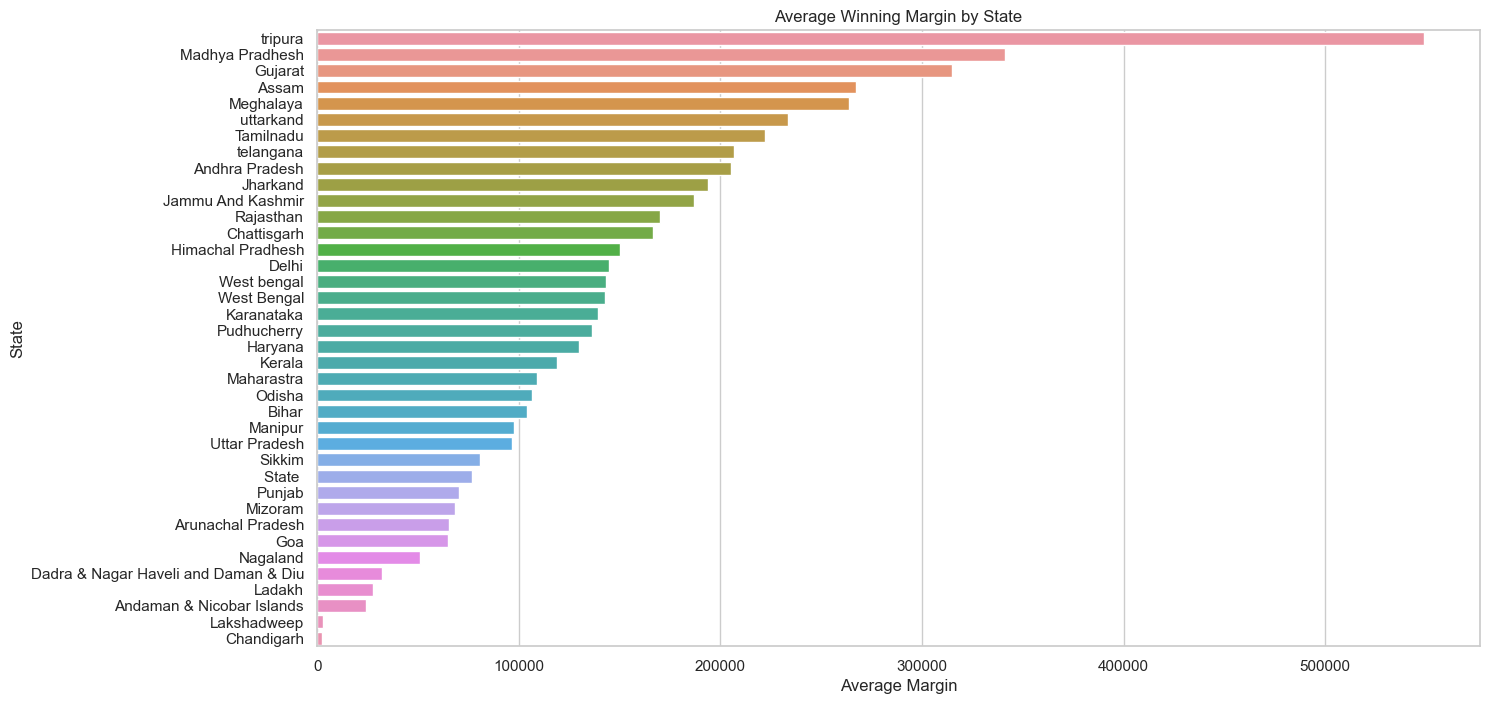

In [10]:
# Group data by State and calculate average winning margin
avg_margin_by_state = election_data.groupby('State')['Margin'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_margin_by_state, x='Margin', y='State', order=avg_margin_by_state.sort_values('Margin', ascending=False)['State'])
plt.title('Average Winning Margin by State')
plt.xlabel('Average Margin')
plt.ylabel('State')
plt.show()


8. Analysis of Leading Party's Performance in Multiple Constituencies
Problem Statement: Analyze the performance of parties leading in multiple constituencies.

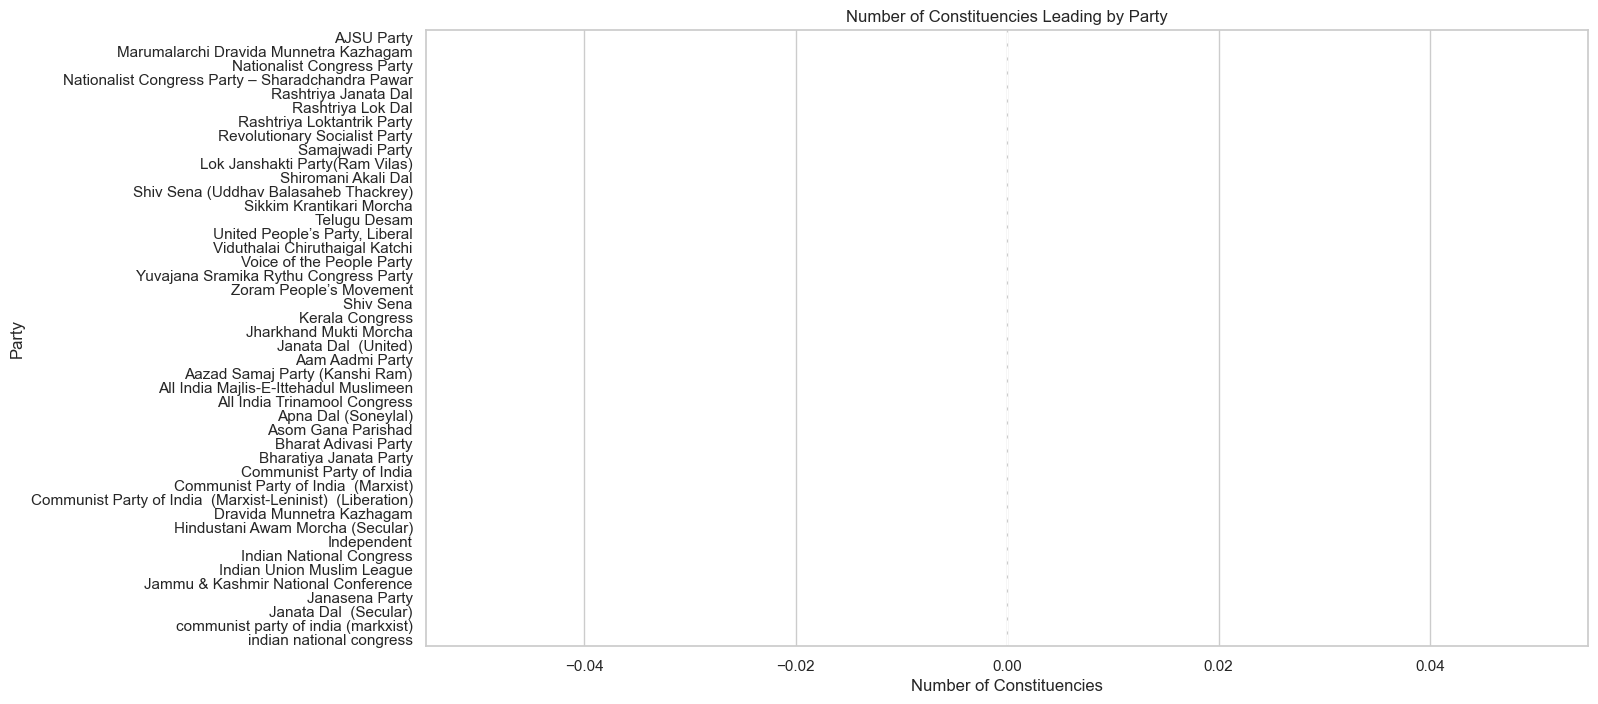

In [11]:
# Group data by leading party and count the number of constituencies they are leading in
leading_party_counts = election_data.groupby('leading party')['Leading In'].sum().reset_index()

# Sort the data for better visualization
leading_party_counts = leading_party_counts.sort_values('Leading In', ascending=True)

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=leading_party_counts, x='Leading In', y='leading party', palette='viridis')
plt.title('Number of Constituencies Leading by Party')
plt.xlabel('Number of Constituencies')
plt.ylabel('Party')
plt.show()


9. Problem Statement: Analyze the distribution of winning margins by leading party.
Insight: This will show how comfortably different parties are winning their constituencies.

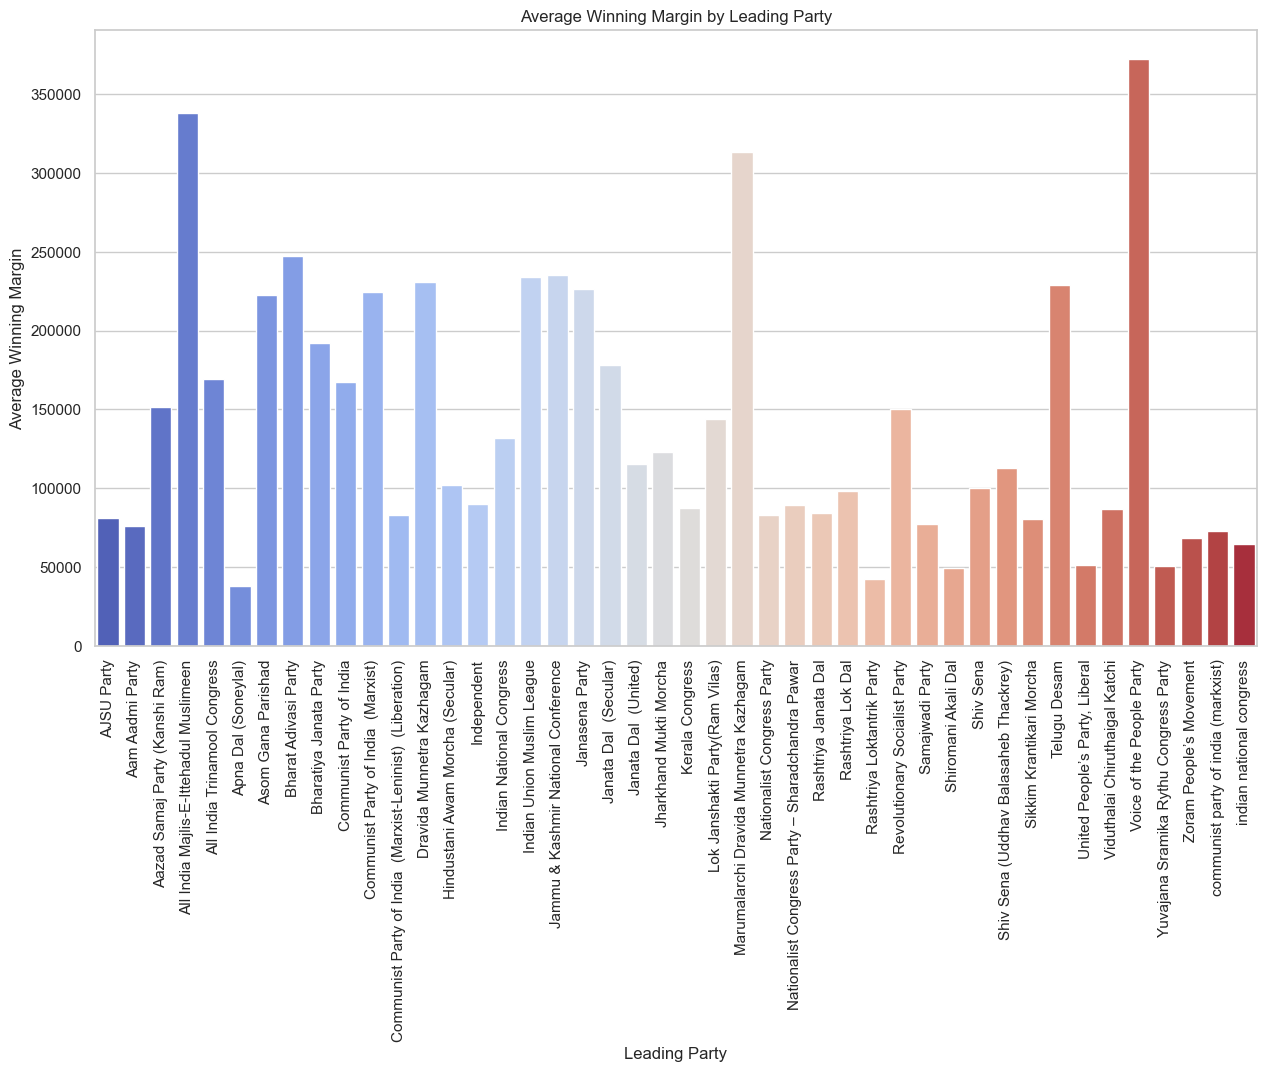

In [12]:
plt.figure(figsize=(15, 8))
mean_margin = election_data.groupby('leading party')['Margin'].mean().reset_index()
sns.barplot(data=mean_margin, x='leading party', y='Margin', palette='coolwarm')
plt.title('Average Winning Margin by Leading Party')
plt.xlabel('Leading Party')
plt.ylabel('Average Winning Margin')
plt.xticks(rotation=90)
plt.show()

10. Problem Statement: Identify the states with the highest average winning margins.
Insight: This will show which states have the most decisive victories.

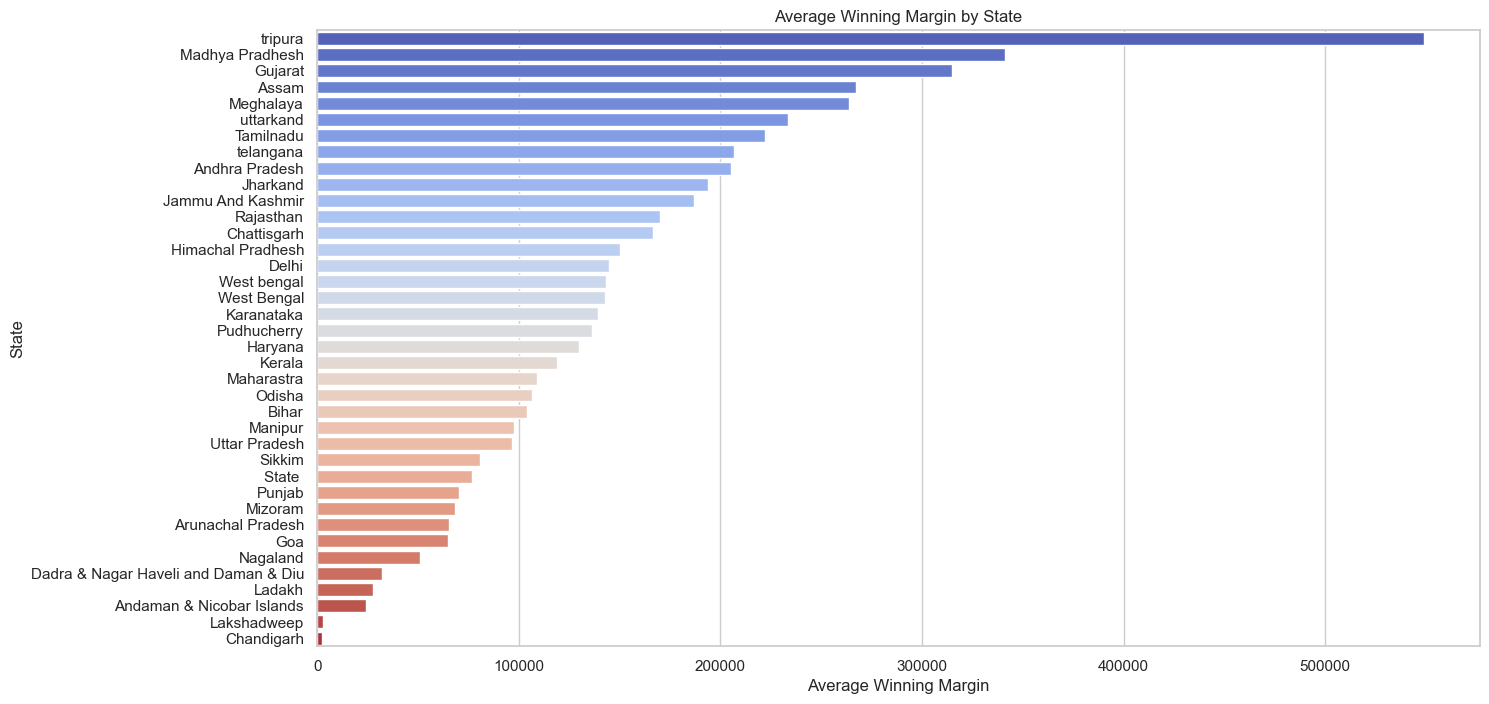

In [13]:
# Group by State and calculate the average winning margin
avg_margin_by_state = election_data.groupby('State')['Margin'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_margin_by_state, x='Margin', y='State', palette='coolwarm', order=avg_margin_by_state.sort_values('Margin', ascending=False)['State'])
plt.title('Average Winning Margin by State')
plt.xlabel('Average Winning Margin')
plt.ylabel('State')
plt.show()
